In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('data/results/results_xlm.csv')

In [5]:
print(data.columns)

Index(['created_date', 'created_time', 'tweet_id', 'tweet', 'likes',
       'retweet_count', 'source', 'user_id', 'user_id_post_count',
       'user_description', 'days_from_join_date', 'user_followers_count',
       'state', 'hashtag', 'clean_tweet', 'no_stopwords', 'sentiment',
       'confidence', 'engagement', 'normalized_score'],
      dtype='object')


In [6]:
from src.preprocessing import *

data = cast_data_type(data)

# print data columns and types
print(data.dtypes)

created_date            datetime64[ns]
created_time                    object
tweet_id                        object
tweet                           object
likes                            Int64
retweet_count                    Int64
source                          object
user_id                         object
user_id_post_count               Int64
user_description                object
days_from_join_date              Int64
user_followers_count             Int64
state                           object
hashtag                         object
clean_tweet                     object
no_stopwords                    object
sentiment                        Int64
confidence                     float64
engagement                     float64
normalized_score               float64
dtype: object


# Import Libraries 

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.preprocessing import StandardScaler
import pyLDAvis.gensim_models
import geopandas as gpd
import plotly.express as px
import re
import warnings
import datetime

# EDA  

In [10]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\c-hiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\c-hiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
data.columns

Index(['created_date', 'created_time', 'tweet_id', 'tweet', 'likes',
       'retweet_count', 'source', 'user_id', 'user_id_post_count',
       'user_description', 'days_from_join_date', 'user_followers_count',
       'state', 'hashtag', 'clean_tweet', 'no_stopwords', 'sentiment',
       'confidence', 'engagement', 'normalized_score'],
      dtype='object')

In [17]:
data.shape

(252563, 20)

## Normalized score statistics

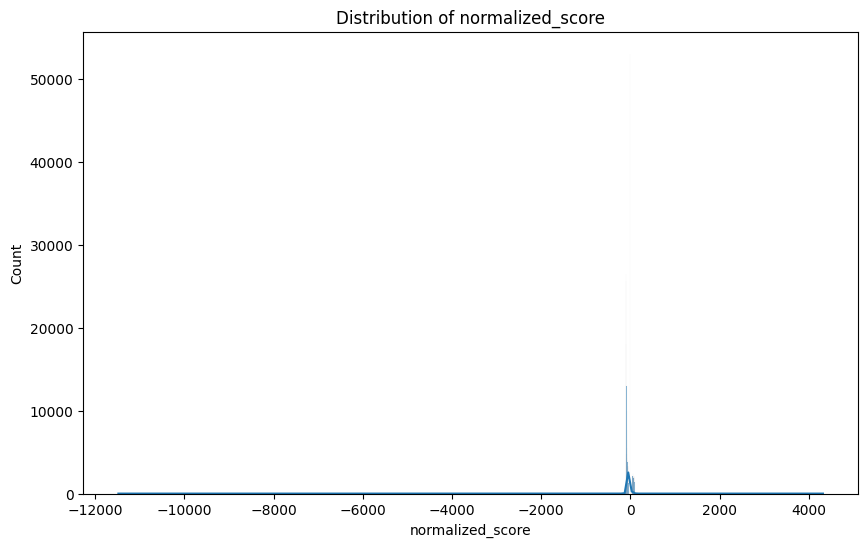

Range of normalized_score: -11481.187641620636 4319.049356877805


count    252563.000000
mean        -41.200542
std          67.396780
min      -11481.187642
25%         -89.381908
50%         -69.253832
75%           0.000000
max        4319.049357
Name: normalized_score, dtype: float64

In [20]:
# Plot normalized_score
plt.figure(figsize=(10, 6))
sns.histplot(data['normalized_score'], kde=True)
plt.title('Distribution of normalized_score')
plt.show()

# Print the range
print('Range of normalized_score:', data['normalized_score'].min(), data['normalized_score'].max())

# Print Normalized Score statistic
data['normalized_score'].describe()

# Distribution of user_follower_count, likes, retweet_counts

In [ ]:
# Pair plot of the variables
sns.pairplot(data[['user_followers_count', 'likes', 'retweet_count', 'user_id_post_count']])
plt.show()

KeyboardInterrupt: 

In [ ]:
# Compute the correlation matrix
corr = data[['user_followers_count', 'likes', 'retweets_count', 'user_post_count']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of user_followers_count, likes, retweets_count, user_post_count')
plt.show()